In [40]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [12]:
data = sm.datasets.fair.load_pandas().data
data['have_affair']= (data.affairs>0).astype(int)

In [15]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,have_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [17]:
data.groupby('have_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
have_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [28]:
y,x = dmatrices('have_affair ~ rate_marriage + age+ yrs_married+children +religious+educ+C(occupation)+C(occupation_husb)',data=data,return_type="dataframe")

In [29]:
y

,have_affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6361,0.0
6362,0.0
6363,0.0
6364,0.0


<AxesSubplot:xlabel='occupation', ylabel='count'>

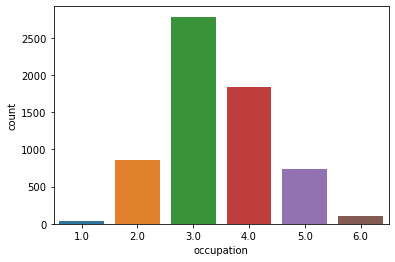

In [30]:
sns.countplot(x = "occupation",data=data)

<AxesSubplot:xlabel='occupation_husb', ylabel='count'>

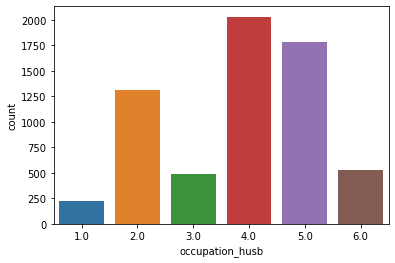

In [31]:
sns.countplot(x = "occupation_husb",data=data)

In [34]:
x = x.rename(columns={'C(occupation)[T.2.0]':'occ_2',
              'C(occupation)[T.3.0]':'occ_3',
              'C(occupation)[T.4.0]':'occ_4',
              'C(occupation)[T.5.0]':'occ_5',
              'C(occupation)[T.6.0]':'occ_6',
              'C(occupation_husb)[T.2.0]':'occ_husb_2',
              'C(occupation_husb)[T.3.0]':'occ_husb_3',
              'C(occupation_husb)[T.4.0]':'occ_husb_4',
              'C(occupation_husb)[T.5.0]':'occ_husb_5',
              'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [35]:
x

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [36]:
y


,have_affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6361,0.0
6362,0.0
6363,0.0
6364,0.0


In [43]:
y =np.ravel(y)

In [47]:
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(x,y)
logistic_reg.score(x,y)

0.726358781024191

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
model2= LogisticRegression(max_iter=1000)
model2.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [57]:
predicted = model2.predict(x_test)


In [63]:
from sklearn import metrics

print("Accuracy is ",metrics.accuracy_score(y_test,predicted))
print("Confusion matrix\n", metrics.confusion_matrix(y_test,predicted))
print("Report \n",metrics.classification_report(y_test,predicted))

Accuracy is  0.7308900523560209
Confusion matrix
 [[1168  135]
 [ 379  228]]
Report 
               precision    recall  f1-score   support

         0.0       0.76      0.90      0.82      1303
         1.0       0.63      0.38      0.47       607

    accuracy                           0.73      1910
   macro avg       0.69      0.64      0.64      1910
weighted avg       0.71      0.73      0.71      1910



In [71]:
#Checking using cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(max_iter=1000), x,y,scoring="accuracy",cv = 10)
scores
scores.mean()

0.7241661976837179